In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.neural_network import MLPRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import median_absolute_error

/Users/guangshanchen/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
# read all training instances
train = pd.read_csv('ice_samples_10years.csv')

In [6]:
train.head()

,Year,Month,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,co2_112,co2_113,co2_114,co2_115,co2_116,co2_117,co2_118,co2_119,co2_120,Value
0,1989,1,13.625677,11.330833,9.135387,7.369000,7.891581,9.808677,11.943433,13.560903,...,333.93,335.56,337.60,339.20,339.00,338.94,338.13,336.65,336.21,14.954774
1,1989,2,14.954774,13.625677,11.330833,9.135387,7.369000,7.891581,9.808677,11.943433,...,334.12,333.93,335.56,337.60,339.20,339.00,338.94,338.13,336.65,15.495536
2,1989,3,15.495536,14.954774,13.625677,11.330833,9.135387,7.369000,7.891581,9.808677,...,335.26,334.12,333.93,335.56,337.60,339.20,339.00,338.94,338.13,15.423548
3,1989,4,15.423548,15.495536,14.954774,13.625677,11.330833,9.135387,7.369000,7.891581,...,336.78,335.26,334.12,333.93,335.56,337.60,339.20,339.00,338.94,14.330333
4,1989,5,14.330333,15.423548,15.495536,14.954774,13.625677,11.330833,9.135387,7.369000,...,337.80,336.78,335.26,334.12,333.93,335.56,337.60,339.20,339.00,13.044129


In [8]:
#features = list(train.columns[0:60]) + list(train.columns[120:132]) + list(train.columns[240:252])
features = list(train.columns[2:122])
features

['t_1',
 't_2',
 't_3',
 't_4',
 't_5',
 't_6',
 't_7',
 't_8',
 't_9',
 't_10',
 't_11',
 't_12',
 't_13',
 't_14',
 't_15',
 't_16',
 't_17',
 't_18',
 't_19',
 't_20',
 't_21',
 't_22',
 't_23',
 't_24',
 't_25',
 't_26',
 't_27',
 't_28',
 't_29',
 't_30',
 't_31',
 't_32',
 't_33',
 't_34',
 't_35',
 't_36',
 't_37',
 't_38',
 't_39',
 't_40',
 't_41',
 't_42',
 't_43',
 't_44',
 't_45',
 't_46',
 't_47',
 't_48',
 't_49',
 't_50',
 't_51',
 't_52',
 't_53',
 't_54',
 't_55',
 't_56',
 't_57',
 't_58',
 't_59',
 't_60',
 't_61',
 't_62',
 't_63',
 't_64',
 't_65',
 't_66',
 't_67',
 't_68',
 't_69',
 't_70',
 't_71',
 't_72',
 't_73',
 't_74',
 't_75',
 't_76',
 't_77',
 't_78',
 't_79',
 't_80',
 't_81',
 't_82',
 't_83',
 't_84',
 't_85',
 't_86',
 't_87',
 't_88',
 't_89',
 't_90',
 't_91',
 't_92',
 't_93',
 't_94',
 't_95',
 't_96',
 't_97',
 't_98',
 't_99',
 't_100',
 't_101',
 't_102',
 't_103',
 't_104',
 't_105',
 't_106',
 't_107',
 't_108',
 't_109',
 't_110',
 't_111'

In [9]:
X = train[features]
y = train['Value']

In [62]:
# no forcing 30 hidden layer size
reg = MLPRegressor(algorithm='l-bfgs', activation='relu', alpha=1e-6, hidden_layer_sizes=(5,), random_state=1)

In [63]:
MAE = cross_val_score(reg, X, y, cv=10, scoring = 'mean_absolute_error') 

In [64]:
MAE.mean()

-0.27090295726451508

In [65]:
clf = reg.fit(X, y)

In [66]:
# predict on all trainings
XT = train[features]

In [67]:
training_pred = clf.predict(XT)

In [68]:
# reshape to an array (one row, n columns)
XT = train.iloc[len(train)-1][2:122].reshape(1,-1)
# total prediction months
start_year = 2015
end_year = 2100
total_mn = (end_year - start_year + 1) * 12 + 1  # the frist prediction is for 201412 
prediction = np.zeros(total_mn)
i = 0
while i < total_mn:
    y_pred = clf.predict(XT)
    if y_pred < 0.0:
        y_pred = 0.0
    prediction[i] = y_pred
    XT = np.insert(XT[0][0:-1],0,y_pred).reshape(1,-1)
    XT
    i += 1

In [69]:
prediction

array([ 12.28661358,  13.70762361,  14.63753619, ...,   0.        ,
         0.        ,   0.        ])

In [70]:
# read all observation data
org = pd.read_csv('NH_seaice_extent_monthly.csv')

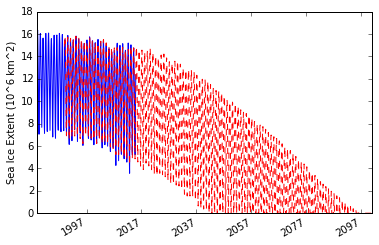

In [74]:
import matplotlib.dates as mdates
import datetime as dt

my_date = []
for year in range(1979, 2101):
    for month in range(1,13):
        my_date.append(str(year) + '{:02d}'.format(month))
# date_fmt is a string giving the correct format for your date.
date_fmt = '%Y%m'
# convert dates into datetime objects
dt_x = [dt.datetime.strptime(s, date_fmt) for s in my_date]

# Now to actually plot your data.
fig, ax = plt.subplots()
# Use plot_date rather than plot when dealing with time data.
ax.plot_date(dt_x[0:432], org['Extent'].tolist(), 'b')
ax.plot_date(dt_x[120:], np.concatenate((training_pred, prediction[1:])), 'r--')
date_formatter = mdates.DateFormatter('%Y')
# Set the major tick formatter to use your date formatter.
ax.xaxis.set_major_formatter(date_formatter)
datemin = dt.date(1979, 1, 1)
datemax = dt.date(2101, 1, 1)
ax.set_xlim(datemin, datemax)
# This simply rotates the x-axis tick labels slightly so they fit nicely.
fig.autofmt_xdate()

plt.ylabel("Sea Ice Extent (10^6 km^2)")
plt.savefig("seac_ice_extent_forcasting_10years.png")
plt.show()
